In [216]:
import pandas as pd
import mplfinance as mpf
import talib

In [217]:
df = pd.read_csv('chart_data.csv',index_col='Date',parse_dates=True)
df.head()

,LTP,% Change,High,Low,Open,Qty.,Turnover
Date,,,,,,,
2024-11-19,"1,127.00",-2.34,"1,177.00","1,127.00","1,175.00","6,871","7,885,799.80"
2024-11-17,"1,154.00",3.04,"1,185.00","1,142.40","1,142.40","9,296","10,763,712.20"
2024-11-14,"1,120.00",-0.44,"1,143.00","1,112.00","1,130.00","6,913","7,777,506.70"
2024-11-13,"1,125.00",-0.53,"1,150.00","1,110.00","1,132.10","4,379","4,961,856.00"
2024-11-12,"1,131.00",-0.04,"1,167.60","1,108.90","1,108.90","5,453","6,262,868.40"


In [218]:
df.shape

(946, 7)

In [219]:
for col in ['LTP','% Change','High','Low','Open','Qty.','Turnover']:
    df[col] = df[col].astype(str).str.replace(',','').astype(float)

df.head()

,LTP,% Change,High,Low,Open,Qty.,Turnover
Date,,,,,,,
2024-11-19,1127.0,-2.34,1177.0,1127.0,1175.0,6871.0,7885799.8
2024-11-17,1154.0,3.04,1185.0,1142.4,1142.4,9296.0,10763712.2
2024-11-14,1120.0,-0.44,1143.0,1112.0,1130.0,6913.0,7777506.7
2024-11-13,1125.0,-0.53,1150.0,1110.0,1132.1,4379.0,4961856.0
2024-11-12,1131.0,-0.04,1167.6,1108.9,1108.9,5453.0,6262868.4


In [220]:
df.index.name = 'Date'
df.columns = df.columns.str.strip()

df.rename(columns={'LTP':'Close'},inplace=True)
df.rename(columns={'Qty.':'Volume'},inplace=True)

df.head()

,Close,% Change,High,Low,Open,Volume,Turnover
Date,,,,,,,
2024-11-19,1127.0,-2.34,1177.0,1127.0,1175.0,6871.0,7885799.8
2024-11-17,1154.0,3.04,1185.0,1142.4,1142.4,9296.0,10763712.2
2024-11-14,1120.0,-0.44,1143.0,1112.0,1130.0,6913.0,7777506.7
2024-11-13,1125.0,-0.53,1150.0,1110.0,1132.1,4379.0,4961856.0
2024-11-12,1131.0,-0.04,1167.6,1108.9,1108.9,5453.0,6262868.4


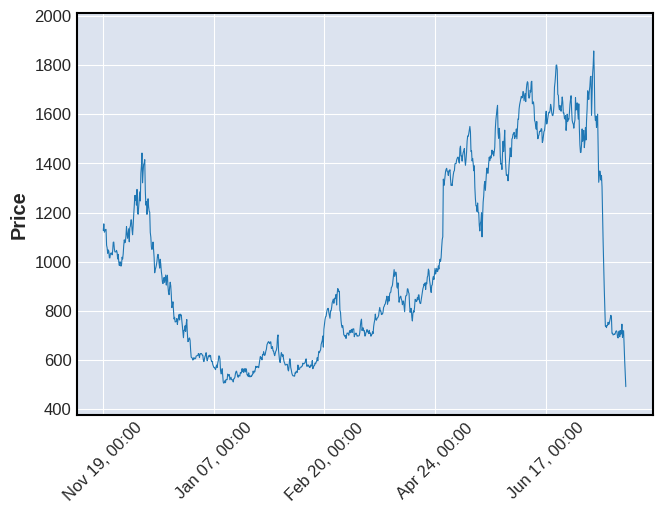

In [221]:
# df = df.iloc[-150:]

mpf.plot(df, type='line')

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


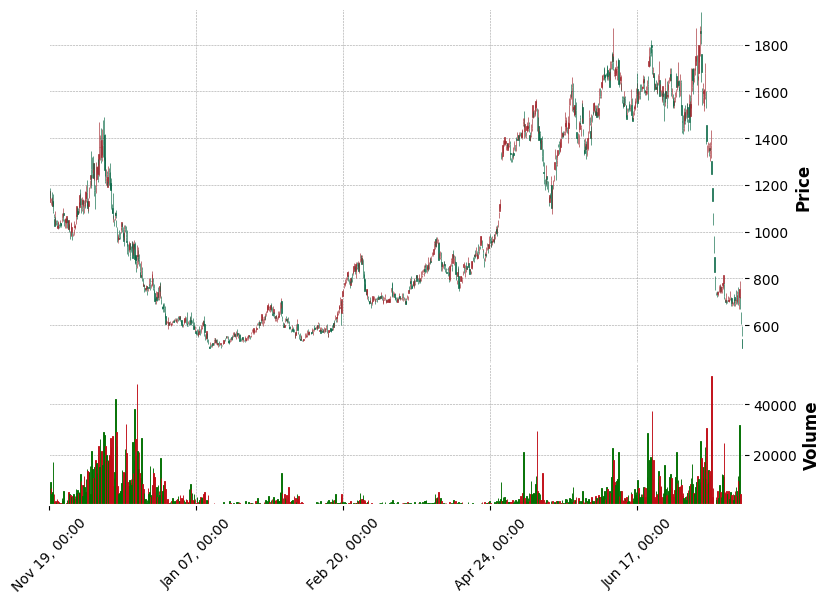

In [222]:
mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True)

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


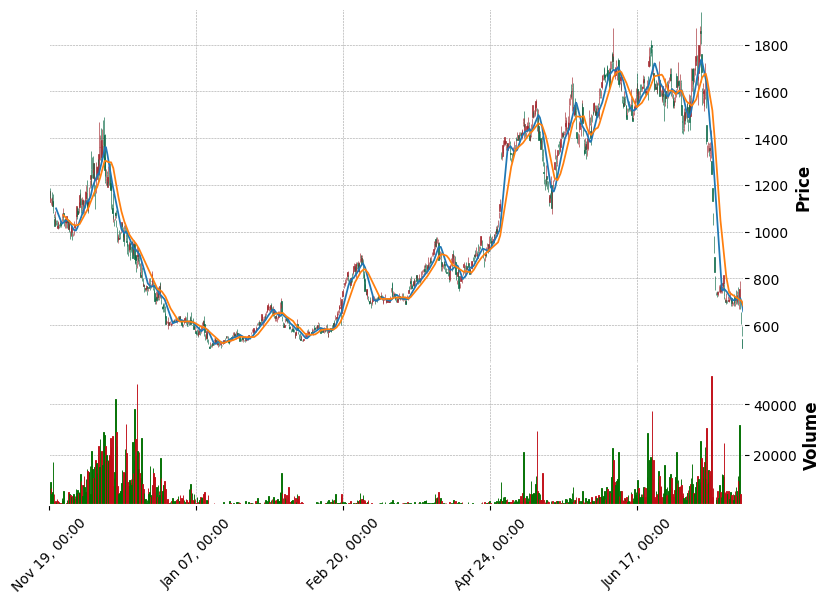

In [223]:
# moving average plot
df['SMA_10'] = talib.SMA(df['Close'], timeperiod=10)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True, addplot=[mpf.make_addplot(df['SMA_10']),mpf.make_addplot(df['SMA_20'])])

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


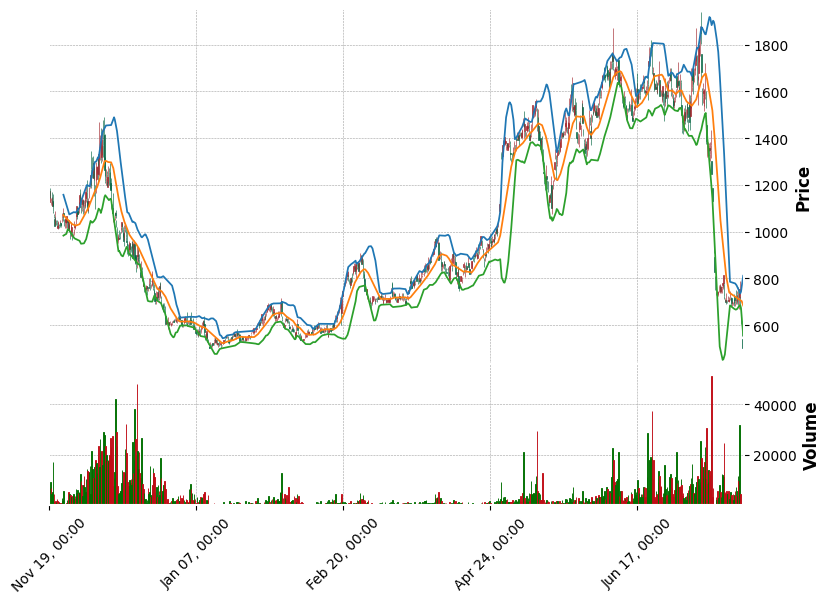

In [224]:
# Bollinger Bands plot
df['upper'], df['middle'], df['lower'] = talib.BBANDS(df['Close'], timeperiod=20)

mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True, addplot=[mpf.make_addplot(df['upper']),mpf.make_addplot(df['middle']),mpf.make_addplot(df['lower'])])

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


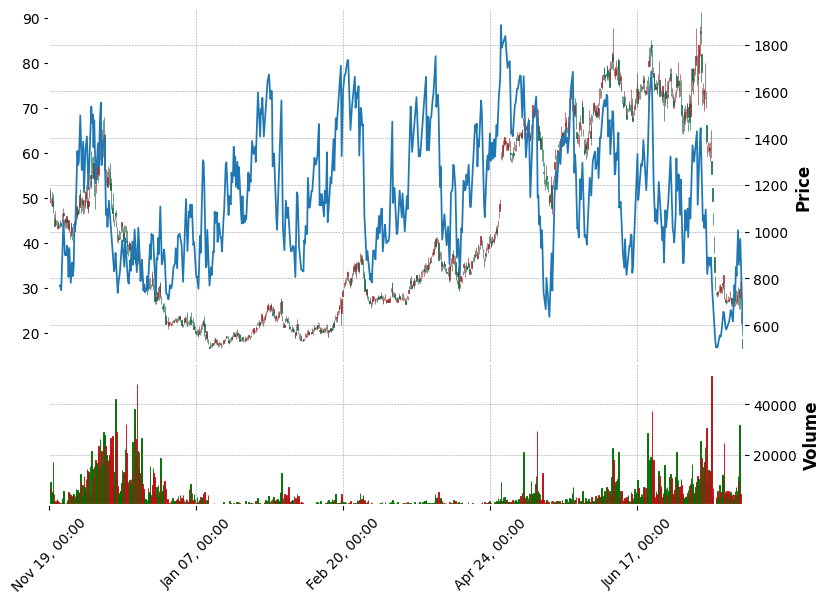

In [225]:
# RSI plot
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True, addplot=[mpf.make_addplot(df['RSI'])])

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


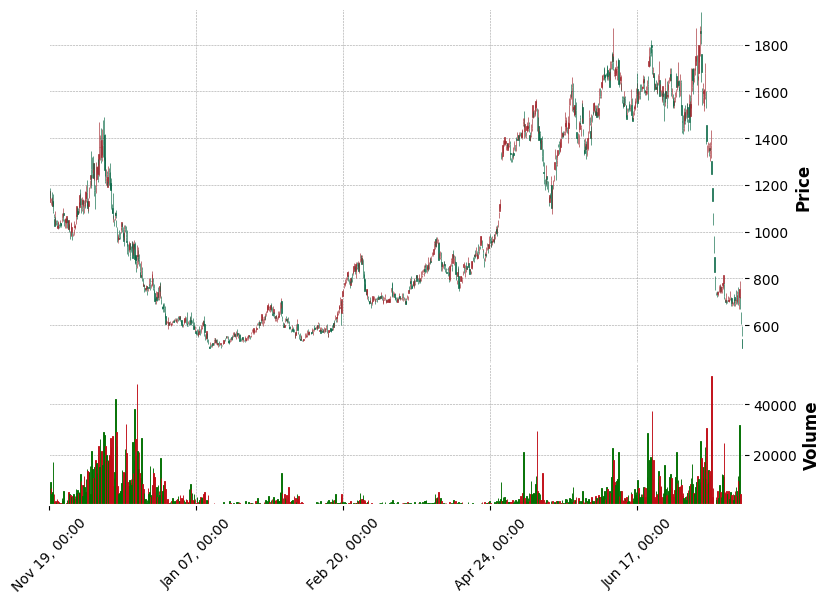

In [226]:
# MACD plot
df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True, addplot=[mpf.make_addplot(df['macd']),mpf.make_addplot(df['macdsignal'])])

/home/uppercase/trading-bot/trading/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


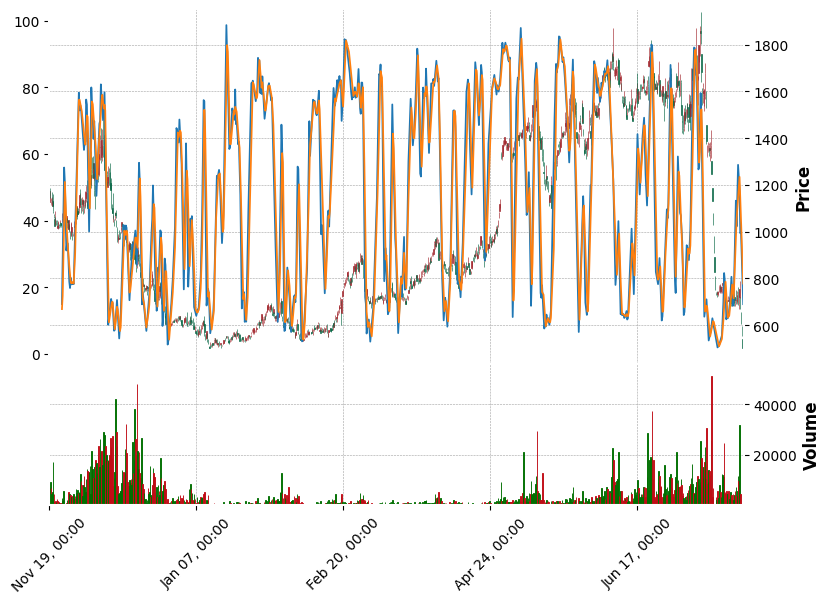

In [227]:
# Stochastic Oscillator plot
df['slowk'], df['slowd'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

mpf.plot(df,type='candle', style='charles', volume=True, tight_layout=True, addplot=[mpf.make_addplot(df['slowk']),mpf.make_addplot(df['slowd'])])

In [228]:
df.head()

,Close,% Change,High,Low,Open,Volume,Turnover,SMA_10,SMA_20,upper,middle,lower,RSI,macd,macdsignal,macdhist,slowk,slowd
Date,,,,,,,,,,,,,,,,,,
2024-11-19,1127.0,-2.34,1177.0,1127.0,1175.0,6871.0,7885799.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-17,1154.0,3.04,1185.0,1142.4,1142.4,9296.0,10763712.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-14,1120.0,-0.44,1143.0,1112.0,1130.0,6913.0,7777506.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-13,1125.0,-0.53,1150.0,1110.0,1132.1,4379.0,4961856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-12,1131.0,-0.04,1167.6,1108.9,1108.9,5453.0,6262868.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
df['Signal'] = 0  # Default: 0 (no position)

df.loc[df['SMA_10'] > df['SMA_20'], 'Signal'] = 1  # Buy signal
df.loc[df['SMA_10'] < df['SMA_20'], 'Signal'] = -1  # Sell signal

In [230]:
df['Buy_Signal'] = (df['SMA_10'] > df['SMA_20']) & (df['SMA_10'].shift(1) <= df['SMA_20'].shift(1))
df['Sell_Signal'] = (df['SMA_10'] < df['SMA_20']) & (df['SMA_10'].shift(1) >= df['SMA_20'].shift(1))

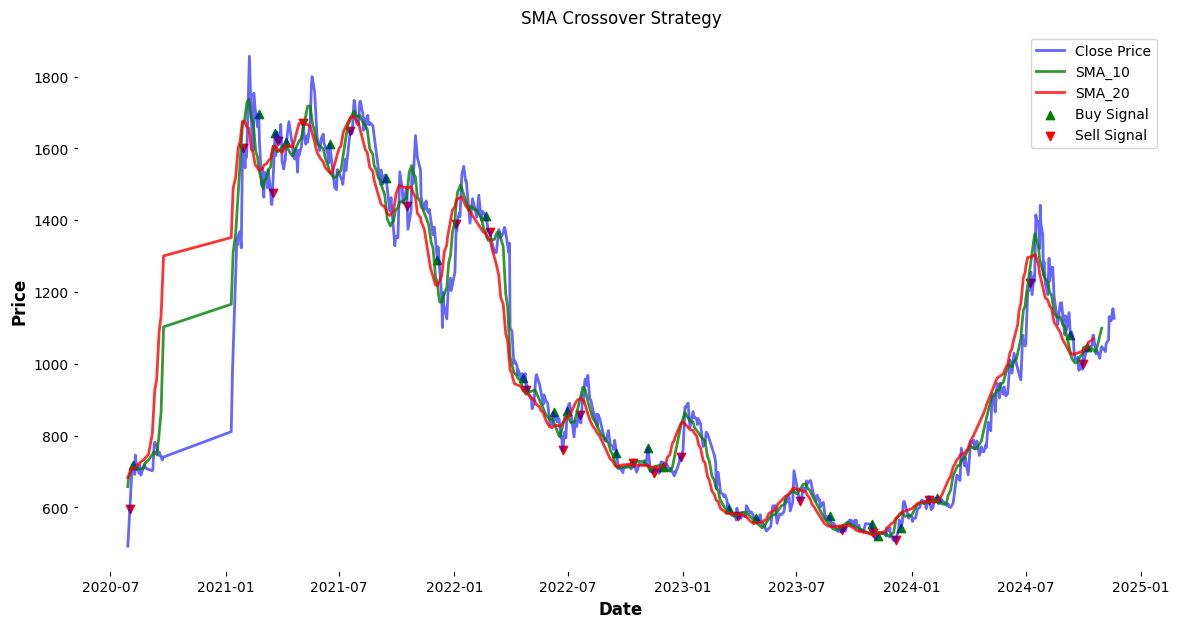

In [231]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)

plt.plot(df.index, df['SMA_10'], label='SMA_10', color='green', alpha=0.8)
plt.plot(df.index, df['SMA_20'], label='SMA_20', color='red', alpha=0.8)

plt.scatter(df.index[df['Buy_Signal']], df['Close'][df['Buy_Signal']], 
            label='Buy Signal', marker='^', color='green', alpha=1)

plt.scatter(df.index[df['Sell_Signal']], df['Close'][df['Sell_Signal']], 
            label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('SMA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [232]:
initial_balance = 10000
balance = initial_balance
position = 0

for i in range(len(df)):
    if df['Buy_Signal'].iloc[i] and balance > 0:
        position = balance / df['Close'].iloc[i]
        balance = 0
    elif df['Sell_Signal'].iloc[i] and position > 0:
        balance = position * df['Close'].iloc[i]
        position = 0

final_balance = balance + (position * df['Close'].iloc[-1])
print(f"Initial Balance: Rs.{initial_balance:}")
print(f"Final Balance: Rs.{final_balance:.2f}")
print(f"Profit: Rs.{final_balance - initial_balance:.2f}")


Initial Balance: Rs.10000
Final Balance: Rs.16282.73
Profit: Rs.6282.73
